In [ ]:
%matplotlib inline                                #importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn



In [ ]:
url = 'https://github.com/sathvikbhupal1/MachineLearning/blob/main/MachineLearning_Datasets/diabetes.csv?raw=true'
df = pd.read_csv(url)                                                        #importing the dataset from my github account and reading it through .read_csv function
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()                                                     #using .info() function to check for the null values and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns                                  #checking the number of columns and column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df['Outcome'].value_counts()                      #checking the total number of values in its classification with .value_counts function

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.describe()                                   #visualising all the metrics of data with the help of .decribe() function

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

no_zeros = ["Glucose","BloodPressure","SkinThickness","BMI"]

for col in no_zeros:
    df[col] = df[col].replace(0, np.NaN)                            #taking off 0 values with NAN in the above mentioned columns as they cannot be 0 in real world.
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.NaN, mean)                          #replacing the Nan with mean value of the column 


In [ ]:
df.describe()                                   #checking the new value with .describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


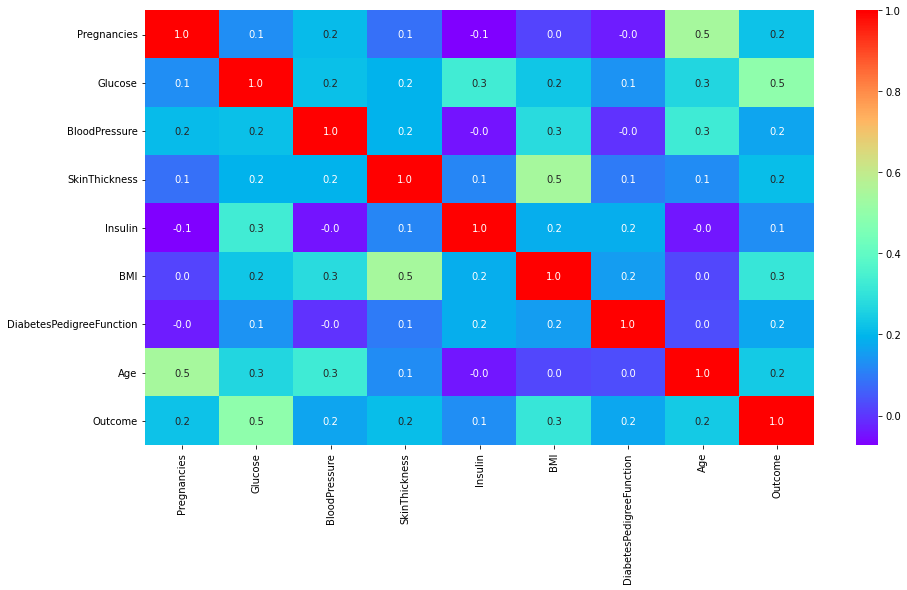

In [ ]:
corr = df.corr()                     #correlation of the data can be found through .corr() function

plt.figure(figsize=(15,8))
sn.heatmap(corr, annot=True, fmt=".1f", cmap="rainbow")                     #correlation of the data can be plotted as a heatmap with the help of seaborn library
plt.show()

In [ ]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']                                        #splitting the data into features (X) and target (Y) to train further

In [ ]:
X.shape                                             #checking its total number of rows & columns to see if its split properly

(768, 8)

In [ ]:
Y.shape                                        #checking its total number of rows & columns to see if its split properly

(768,)

In [ ]:
from sklearn.model_selection import train_test_split                                      #importing essential libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,  mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler




In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)                        #splitting the data into train and test portions

In [ ]:
s=StandardScaler()
X_train=s.fit_transform(X_train)                           #standard scaler is used to deal with the outliers as data has extreme points
X_test=s.transform(X_test)

In [ ]:
model = SVC(kernel = 'linear', C=2)                     #building support vector machine model/classifier 
model = model.fit(X_train, y_train)                     #applying the support vector machine model to the training data

predictions = model.predict(X_test)                      #predicting using test_data on the basis of model performance on training data

print("Score:", round(model.score(X_test, y_test),2)*100 ,'%')  #checking the score by comparing the feature test data to target test data and compute accuracy


print("MAE:", mean_absolute_error(y_test, predictions))       #printing Mean_absolute_error to evaluate model performance
print('MSE:', mean_squared_error(y_test, predictions))        #printing Mean_squared_error to evaluate model performance
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))    #printing root_Mean_absolute_error to evaluate model performance





Score: 80.0 %
MAE: 0.2012987012987013
MSE: 0.2012987012987013
RMSE: 0.44866323818505716
